<a href="https://colab.research.google.com/github/Gur07/Churn_predictor/blob/main/customer_Churn_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np


In [45]:
df = pd.read_csv('/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df.shape

(10000, 11)

In [48]:
df['Geography'].value_counts()



Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [49]:
df['Gender'].value_counts()


Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [50]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [51]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [53]:
X_test_trf

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [54]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [56]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
128/128 [==============================] - 2s 6ms/step - loss: 0.6115 - accuracy: 0.7408 - val_loss: 0.5772 - val_accuracy: 0.7969
Epoch 2/10
128/128 [==============================] - 0s 4ms/step - loss: 0.5498 - accuracy: 0.7958 - val_loss: 0.5293 - val_accuracy: 0.7969
Epoch 3/10
128/128 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7958 - val_loss: 0.5001 - val_accuracy: 0.7969
Epoch 4/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7958 - val_loss: 0.4807 - val_accuracy: 0.7969
Epoch 5/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7958 - val_loss: 0.4671 - val_accuracy: 0.7969
Epoch 6/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7958 - val_loss: 0.4578 - val_accuracy: 0.7969
Epoch 7/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7955 - val_loss: 0.4510 - val_accuracy: 0.7975
Epoch 

In [59]:
y_pred_val = model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [60]:
y_pred_val

array([[0.22293098],
       [0.33403772],
       [0.15894051],
       ...,
       [0.19751632],
       [0.16202113],
       [0.22548288]], dtype=float32)

In [61]:
y_pred =  y_pred_val.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

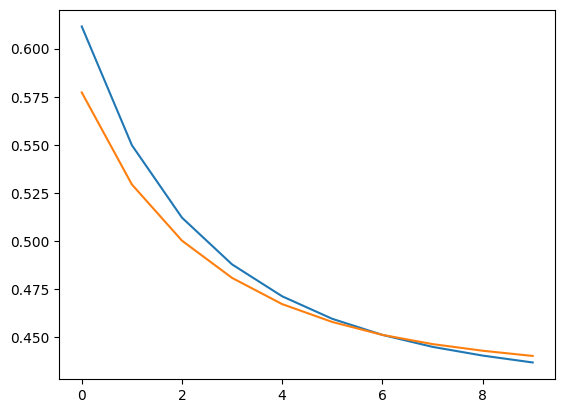

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

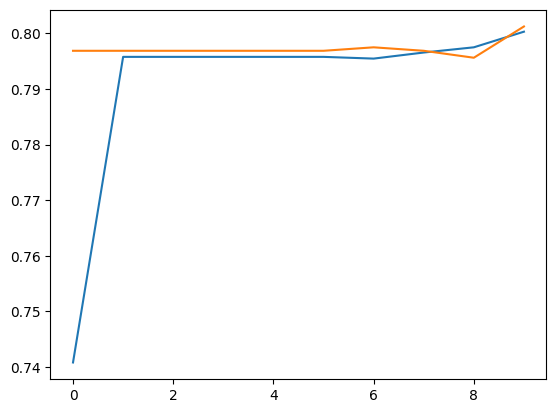

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])